In [ ]:
import colorama
from IPython.display import display,HTML

#colorama.init(autoreset=False)

#colors=(colorama.Fore.RED,colorama.Fore.GREEN,colorama.Fore.BLUE,colorama.Fore.YELLOW,colorama.Fore.CYAN)
colors=("red","green","blue","purple","magenta","#F6BE00")

def SetUpTeams():
    Teams=[]
    teams_count= int(input("Enter number of teams :"))
    for i in range(teams_count):
        team_name = input("Enter team name : ")
        Team={}
        Team["team_name"] =  team_name           
        Team["index"] = i
        Team["score"] = 0
        Team["color"] = colors[i% len(colors)] 
        Teams.append(Team)
    return Teams    

        
Teams = SetUpTeams()

In [ ]:
import random

def LoadQuestions(file_name):
    questions=[]
    with open(file_name,"r") as f:
        L1=f.read().splitlines()
    for x in L1:
        q=x.split("|")
        questions.append(q)
    

    return questions    
Questions = LoadQuestions("quiz_questions.txt")        
#random.shuffle(Questions)
i=1
for q in Questions:
    print(i,".",q[1])
    i=i+1

In [ ]:
from IPython.display import HTML,display
def ResetScores(Teams):
     for Team in Teams:   
       
        Team["score"]=0
        
def PrintTeams(Teams):
    s=""
    for Team in Teams:   
        color=Team["color"]
        t=Team["team_name"] + " : " +  str(Team["score"])
        s+=f"<span style='color:{color};font-family:Courier New;font-weight:bold;'>{t}&nbsp;&nbsp;&nbsp;</span>"
    display(HTML(s))      
      
PrintTeams(Teams)   

In [ ]:
question_index=0
team_index=0
ResetScores(Teams)
import matplotlib.pyplot as plt
def GetTeamColors(Teams):
    colors=[]
    for t in Teams:
        colors.append(t["color"])
    return colors
def GetTeamScores(Teams):
    scores=[]
    for t in Teams:
        scores.append(t["score"])
    print(scores)    
    return scores  
def DisplayBarScores(Teams):
    x=[]
    y=[]
    for t in Teams:
        x.append(t["team_name"])
        y.append(t["score"])
    fig, ax = plt.subplots()
    bars = ax.barh(x, y,color=GetTeamColors(Teams))
    ax.bar_label(bars)    
    #plt.barh(x, y,color=GetTeamColors(Teams),label="pp") 
    plt.show()    
    
#DisplayBarScores(Teams)

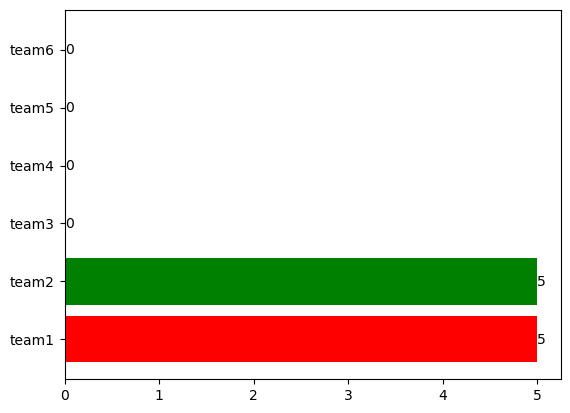

In [7]:
import sys
from IPython.display import clear_output,HTML
correct_points = 5
def PrintQuestion(index):
    question = GetQuestion(index)
    qno=str(index+1)+"."
    print(qno,question)
    typ = Questions[index][0]
    choice1 = Questions[index][2]
    choice2 = Questions[index][3]
    choice3 = Questions[index][4]
    choice4 = Questions[index][5]
    if typ == "1": #MCQ
        
        print("\n1.",choice1)
        print("2.",choice2)
        print("3.",choice3)
        print("4.",choice4)
        
        
def GetQuestion(index):
    return Questions[index][1]
def GetQuestionAnswer(index):
    return Questions[index][6].strip().lower()
def AddTeamScore(index,score):
    Teams[index]["score"]+=score
def GetTeamColor(index):
    Teams[index]["color"]

proceed="y"
while(proceed!="n"):
    clear_output()
    display(HTML("<hr>"))   
    PrintTeams(Teams)   
    display(HTML("<hr>"))   
    team_color=GetTeamColor(team_index)
    team_name=Teams[team_index]["team_name"]
    s=f"<H3 style='color:{team_color};'>{team_name}</H3>"
    
    display(HTML(s))  
    #print("Question for : " , Teams[team_index]["team_name"])
   
    PrintQuestion(question_index)
    display(HTML("<hr>"))
    #print("",flush=True)
    sys.stdout.flush()

    pass
    answer=input("Enter answer : ").strip().lower()
    correct_answer=GetQuestionAnswer(question_index)
    if answer==correct_answer:
        print("✅ Correct")
        
        AddTeamScore(team_index,correct_points)
    else:
        print("❌ Sorry Incorrect")
        print("Correct Answer : ",correct_answer)
    question_index +=1
    team_index+=1
    team_index %= len(Teams)
    #DisplayBarScores(Teams)
    display(HTML("<hr>"))
    if question_index >= len(Questions)  :
        input("End of quiz. Press any key to continue")    
        break;
    proceed=input("Proceed ?(y/n/s)")
    if(proceed=="s"):
          clear_output()
          DisplayBarScores(Teams)
          proceed=input("Proceed ?(y/n/s)")    
    
clear_output()
DisplayBarScores(Teams)
    
